In [21]:
import torch

In [22]:
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

In [23]:
transform = transforms.Compose ([
    transforms.ToTensor(),
    transforms.Normalize((0.5),(0.5))
])

In [24]:
trainset= datasets.MNIST('~/.pytorch/MNIST_data/', download= True, train = True, transform= transform)

In [25]:
trainloader= torch.utils.data.DataLoader(trainset,batch_size=64,shuffle = True)

In [36]:
model = nn.Sequential(nn.Linear(784,512),
                     nn.ReLU(),
                     nn.Linear(512,256),
                     nn.ReLU(),
                     nn.Linear(256,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1))


criterion= nn.NLLLoss()


In [37]:
print("Intital Weights", model[0].weight)

Intital Weights Parameter containing:
tensor([[ 0.0127, -0.0088, -0.0296,  ...,  0.0212, -0.0250,  0.0220],
        [-0.0252, -0.0052, -0.0219,  ..., -0.0015, -0.0213,  0.0321],
        [ 0.0160,  0.0212, -0.0037,  ..., -0.0236, -0.0017, -0.0035],
        ...,
        [ 0.0254,  0.0242, -0.0331,  ...,  0.0057,  0.0159, -0.0224],
        [ 0.0049, -0.0277, -0.0267,  ...,  0.0306, -0.0069,  0.0242],
        [ 0.0302,  0.0088, -0.0325,  ...,  0.0221, -0.0056,  0.0295]],
       requires_grad=True)


In [38]:
from torch import optim
optimizer= optim.SGD(model.parameters(), lr=0.01)

In [64]:
epochs= 25
running_loss=0
loss_value=[]


for e in range(epochs):
    running_loss+=0
    
for images, labels in trainloader:
    images=images.view(images.shape[0],-1)
    
    optimizer.zero_grad()


    output= model.forward(images)
    loss= criterion(output,labels)
    loss.backward()
    optimizer.step()

    running_loss+=loss.item()* images.size(0)
    loss_value.append(running_loss / len(trainloader))
else:
    print("Loss",loss)
    print(f"Epoch: {epochs+1} \tTraining Loss: {running_loss/len(trainloader)}")
        


Loss tensor(0.1672, grad_fn=<NllLossBackward>)
Epoch: 26 	Training Loss: 9.087577084234274


In [65]:
import matplotlib.pyplot as plt
import numpy as np

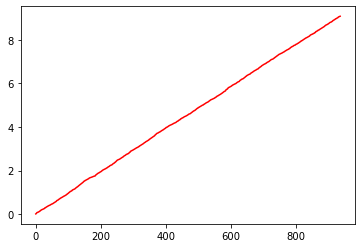

In [66]:
plt.plot(np.array(loss_value), 'r')



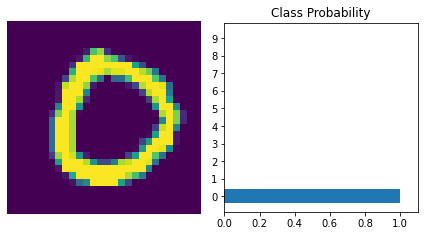

In [86]:
%matplotlib inline
import helper


images, labels = next(iter(trainloader))
img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)